In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("/content/dataset.csv")
df.head()

,RoomArea,NumberofAppliances,Outside Temperature,InsulationThickness,BuildingType,HVACSystem,AverageTemperature,EnergyConsumption
0,302,5,-9.638784,7.227564,Residential,Window AC,-8.444161,1828.820920
1,470,17,13.536505,1.086168,Residential,Window AC,15.267517,2307.834235
2,306,17,13.948559,3.590366,Commercial,Window AC,12.029111,1591.374161
3,271,18,5.866391,1.191942,Residential,Split AC,4.481526,1463.371403
4,388,12,-0.518886,3.750820,Residential,Central AC,1.025799,2198.909856


In [10]:
df.shape

(1000, 8)

In [4]:
df.tail()

,RoomArea,NumberofAppliances,Outside Temperature,InsulationThickness,BuildingType,HVACSystem,AverageTemperature,EnergyConsumption
995,414,13,5.369585,6.234870,Residential,Window AC,5.873804,2163.915879
996,410,16,8.004934,2.054257,Residential,Window AC,6.306049,2113.570960
997,231,6,13.170654,2.520616,Residential,Window AC,11.620242,969.943740
998,357,7,20.374041,4.247931,Commercial,Central AC,18.571277,1602.923718
999,484,9,-6.045055,2.848030,Commercial,Central AC,-7.015138,2643.004907


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RoomArea             1000 non-null   int64  
 1   NumberofAppliances   1000 non-null   int64  
 2   Outside Temperature  1000 non-null   float64
 3   InsulationThickness  1000 non-null   float64
 4   BuildingType         1000 non-null   object 
 5   HVACSystem           1000 non-null   object 
 6   AverageTemperature   1000 non-null   float64
 7   EnergyConsumption    1000 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 62.6+ KB


In [9]:
df.describe()

,RoomArea,NumberofAppliances,Outside Temperature,InsulationThickness,AverageTemperature,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,349.724000,11.999000,9.719271,4.592226,9.712394,1813.907085
std,85.444488,4.358669,11.459586,1.991828,11.473614,470.603884
min,200.000000,5.000000,-9.992464,1.003099,-11.510723,731.680918
25%,278.500000,8.000000,-0.537895,2.900386,-0.442051,1453.442638
50%,349.500000,12.000000,9.829999,4.687266,9.880269,1803.590371
75%,423.250000,16.000000,19.674842,6.314432,19.586637,2168.074502
max,499.000000,19.000000,29.883126,7.997997,31.492076,2920.190528


In [6]:
df.isnull().sum()

,0
RoomArea,0
NumberofAppliances,0
Outside Temperature,0
InsulationThickness,0
BuildingType,0
HVACSystem,0
AverageTemperature,0
EnergyConsumption,0


In [12]:
df = df.dropna()

In [11]:
df = df.drop_duplicates()

<Axes: >

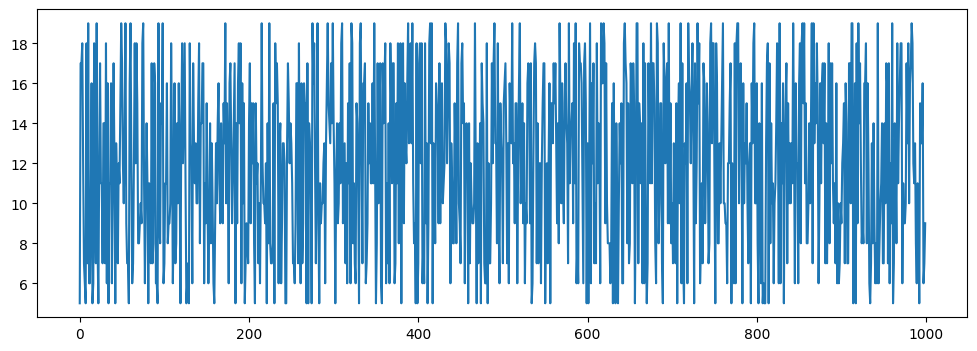

In [14]:
df['NumberofAppliances'].plot(figsize=(12,4))

<Axes: >

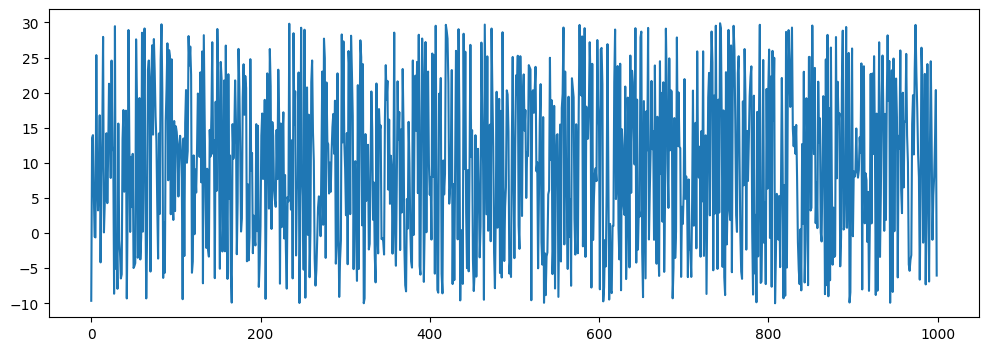

In [18]:
df['Outside Temperature'].plot(figsize=(12,4))

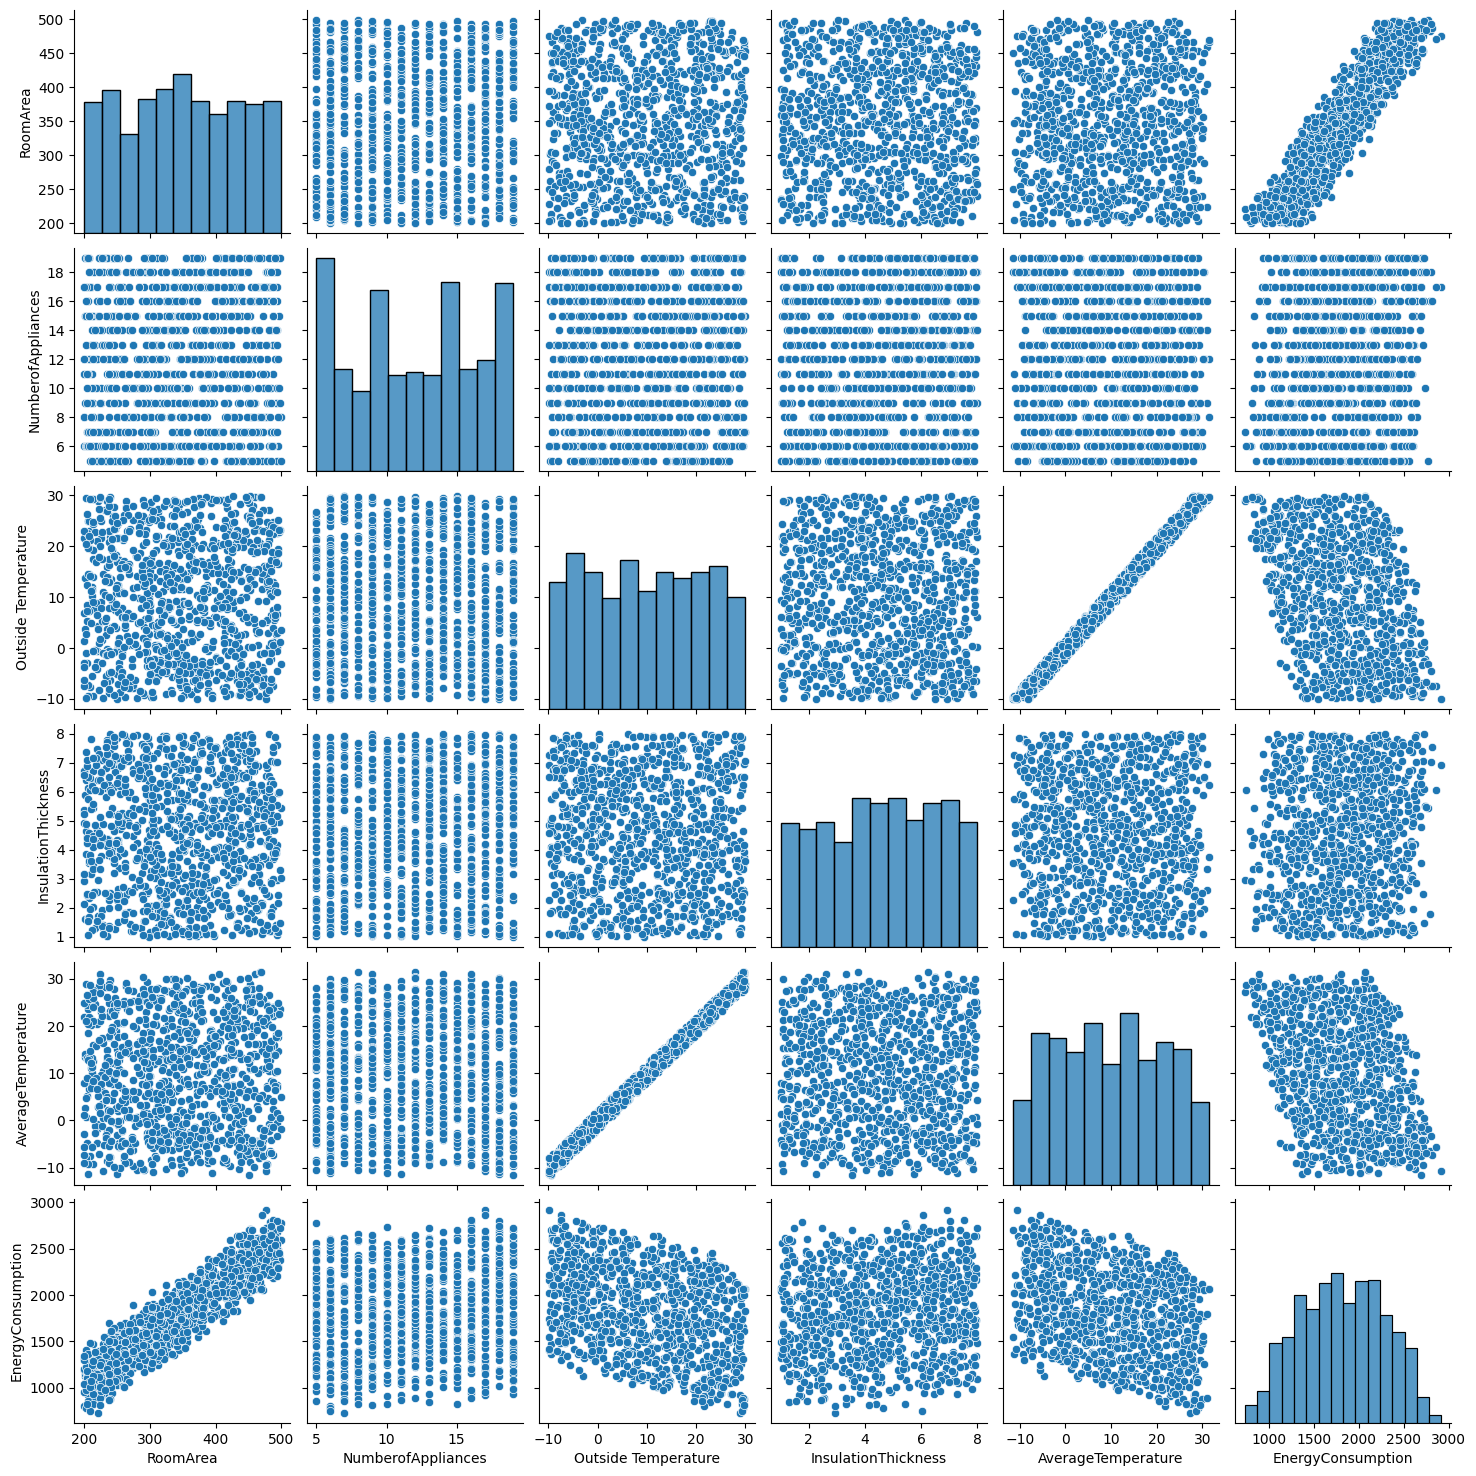

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt



sns.pairplot(df)
plt.show()

In [21]:
df_encoded = pd.get_dummies(df, columns=["BuildingType", "HVACSystem"], drop_first=True)


In [22]:
X = df_encoded.drop(columns=["EnergyConsumption"])
y = df_encoded["EnergyConsumption"]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [26]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test_scaled)
accuracy = r2_score(y_test, y_pred)
print("Model Accuracy (R² Score):", accuracy)

Model Accuracy (R² Score): 0.989493278160502
